In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
%matplotlib inline
import warnings
from collections import Counter
from imblearn.over_sampling import ADASYN
warnings.filterwarnings('ignore')

In [2]:
#load data
df = pd.read_csv("labelled_crypto_data.csv")
df.sample(5)

,news,date,Sentiment
1982,coinkite one secure useful online bitcoin wall...,2013-02-04,Bullish
15751,etherindex llc wilmington delbased corporation...,2017-01-15,Neutral
11651,key highlightsethereum classic price continued...,2014-07-05,Neutral
27779,march delaware state legislator drafted bill w...,2014-06-16,Neutral
32590,gox rising offer usd per bitcoin canaan disapp...,2020-05-22,Neutral


In [3]:
#label encoding
df['label'] = df['Sentiment'].map({
    'Bullish' : 0, 
    'Neutral': 1, 
    'Bearish': 2, 
})
df.sample(5)

,news,date,Sentiment,label
12005,morgan stanley could latest bank join rank gol...,2014-08-25,Neutral,1
36844,bitcoin holding ground altcoins rally,2018-09-19,Bullish,0
7750,earlier morning published presession bitcoin p...,2014-01-07,Neutral,1
1191,bitcoin price broken key psychological level m...,2017-12-16,Bullish,0
12708,bitcoin price key highlightsbitcoin price made...,2014-12-09,Neutral,1


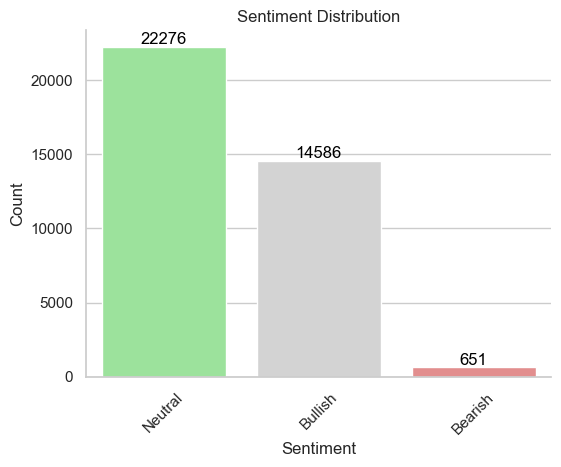

In [4]:
# Ploting the sentiment bar chart
sentiment_counts = df["Sentiment"].value_counts()

sentiments = sentiment_counts.index
colors = ["lightgreen", "lightgray", "lightcoral"]

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4.5))
ax = sns.barplot(x=sentiments, y=sentiment_counts, palette=colors)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

for p, label in zip(ax.patches, sentiment_counts):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

sns.despine()
plt.xticks(rotation=45)
plt.show()

In [5]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    df.news, 
    df.label, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label
)

In [6]:
# creating a pipeline object and printing classification report
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier(n_neighbors=50))         
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66      2917
           1       0.77      0.76      0.76      4456
           2       0.00      0.00      0.00       130

    accuracy                           0.72      7503
   macro avg       0.47      0.48      0.48      7503
weighted avg       0.71      0.72      0.71      7503



# Undersampling

In [7]:
# Class count saving
count_class_1, count_class_0,count_class_2 = df.label.value_counts()
df_class_0 = df[df['label'] == 0]
df_class_1 = df[df['label'] == 1]
df_class_2 = df[df['label'] == 2]

In [8]:
# Undersample 0-class and 1-c
df_class_0_under = df_class_0.sample(count_class_2)
df_class_1_under = df_class_1.sample(count_class_2)
df_test_under = pd.concat([df_class_0_under, df_class_1_under,df_class_2], axis=0)
print('Random under-sampling:')
print(df_test_under.label.value_counts())

Random under-sampling:
0    651
1    651
2    651
Name: label, dtype: int64


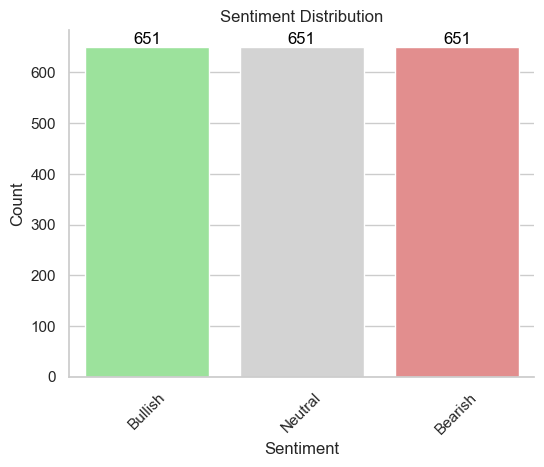

In [9]:
# Ploting the sentiment bar chart
sentiment_counts = df_test_under.Sentiment.value_counts()

sentiments = sentiment_counts.index
colors = ["lightgreen", "lightgray", "lightcoral"]

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4.5))
ax = sns.barplot(x=sentiments, y=sentiment_counts, palette=colors)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

for p, label in zip(ax.patches, sentiment_counts):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

sns.despine()
plt.xticks(rotation=45)

plt.show()

In [10]:
X = df_test_under['news']
y = df_test_under['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [11]:
# Number of classes in training Data
y_train.value_counts()

2    521
1    521
0    520
Name: label, dtype: int64

In [12]:
# creating a pipeline object and printing classification report
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier(n_neighbors=50))         
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.76      0.62       131
           1       0.61      0.39      0.48       130
           2       0.69      0.64      0.66       130

    accuracy                           0.60       391
   macro avg       0.61      0.60      0.59       391
weighted avg       0.61      0.60      0.59       391



# Oversampling

In [13]:
# Oversample 0-class,2-class 
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_class_2_over = df_class_2.sample(count_class_1, replace=True)

df_test_over = pd.concat([df_class_1, df_class_0_over,df_class_2_over], axis=0)

print('Random over-sampling:')
print(df_test_over.label.value_counts())

Random over-sampling:
1    22276
0    22276
2    22276
Name: label, dtype: int64


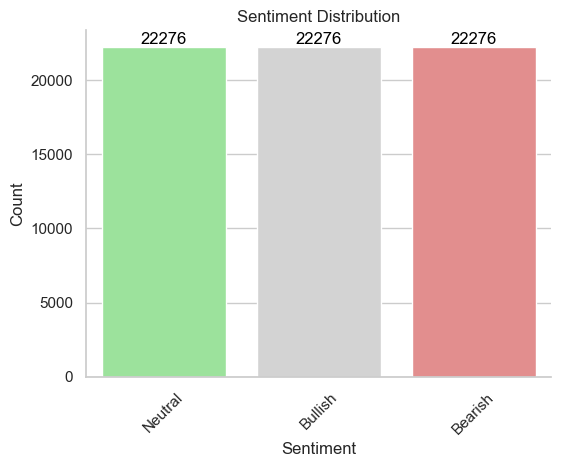

In [14]:
# Ploting the sentiment bar chart
sentiment_counts = df_test_over.Sentiment.value_counts()

sentiments = sentiment_counts.index
colors = ["lightgreen", "lightgray", "lightcoral"]

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4.5))
ax = sns.barplot(x=sentiments, y=sentiment_counts, palette=colors)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

for p, label in zip(ax.patches, sentiment_counts):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

sns.despine()
plt.xticks(rotation=45)

plt.show()

In [15]:
# Train test split
X = df_test_over['news']
y = df_test_over['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [16]:
# creating a pipeline object and printing classification report
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier(n_neighbors=50))         
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      4456
           1       0.76      0.46      0.57      4455
           2       0.69      0.98      0.81      4455

    accuracy                           0.70     13366
   macro avg       0.71      0.70      0.69     13366
weighted avg       0.71      0.70      0.69     13366



# ADASYN

In [17]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [18]:
df.head()

,news,date,Sentiment,label
0,bitcoin priced usd mt goxabove gox price pm gm...,2017-08-15,Neutral,1
1,bitcoin price fib level dmas ok last week like...,2017-05-12,Bullish,0
2,national australia bank loom melbourne citizen...,2017-09-19,Neutral,1
3,recent report china indicate may bitcoin ban m...,2014-10-03,Bullish,0
4,opened st bitcoin trade position price current...,2016-01-15,Neutral,1


In [19]:
X = df['news']
y = df['label']

In [20]:
# Check the class distribution before oversampling
print("Class distribution before oversampling:", Counter(df['label']))

adasyn = ADASYN( n_neighbors=2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(X)
X_resampled, y_resampled = adasyn.fit_resample(tfidf_features, y)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))


Class distribution before oversampling: Counter({1: 22276, 0: 14586, 2: 651})
Class distribution after oversampling: Counter({0: 22610, 2: 22319, 1: 22276})


In [21]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=15, stratify=y_resampled)

In [22]:
# KNN classifier training and classification report
knn_classifier = KNeighborsClassifier(n_neighbors=50)  

knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print(classification_rep)

              precision    recall  f1-score   support

           0       0.65      0.43      0.51      4522
           1       0.89      0.18      0.30      4455
           2       0.47      1.00      0.64      4464

    accuracy                           0.53     13441
   macro avg       0.67      0.53      0.48     13441
weighted avg       0.67      0.53      0.48     13441



# SMOTE

In [25]:
# Check the class distribution before oversampling
print("Class distribution before oversampling:", Counter(df['label']))

X = df['news']
y = df['label']

tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(tfidf_features, y)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))


Class distribution before oversampling: Counter({1: 22276, 0: 14586, 2: 651})
Class distribution after oversampling: Counter({1: 22276, 0: 22276, 2: 22276})


In [26]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=15, stratify=y_resampled)
# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=50)

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print(classification_rep)

              precision    recall  f1-score   support

           0       0.70      0.52      0.60      4456
           1       0.88      0.19      0.31      4455
           2       0.49      1.00      0.66      4455

    accuracy                           0.57     13366
   macro avg       0.69      0.57      0.52     13366
weighted avg       0.69      0.57      0.52     13366



# So we fix SMOTE to deal with class imbalance